In [1]:
from astro_constants import *
from source_info import *
from parameters import *

Output saved to coronal_parameters.txt
Output appended to coronal_parameters.txt


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import kv, gamma

In [3]:
## leptons

def rate_synch_e(B, Ee):
    '''Eq. (5) of Romero et al. (2010)'''
    UB = B**2 / (8*np.pi)
    return 4/3 * sigmaT * c * UB * Ee / (mec2)**2
    # return 4/3 * sigmaT * c * UB * (Ee/mec2)**2

    

def rate_synch_p(B, Ep):
    '''Eq. (5) of Romero et al. (2010)'''
    UB = B**2 / (8*np.pi)
    return (4/3) * (me/mp)**3 * sigmaT * c * UB * Ep / (mec2 * mpc2)
    # return (4/3) * (me / mp)**2 * sigmaT * c * UB * (Ep/mpc2)**2


In [ ]:
# ## including acc

# def time_acc_regime3(va, delta_RX):
#     v_in = 0.05 * va
#     beta_in = v_in / c
#     d_ur = 2 * beta_in * ( 3 * beta_in**2 + 3*beta_in + 1 ) / ( 3 * (beta_in + 0.5) * (1 - beta_in**2) )
    
#     return 4 * delta_RX / (c * d_ur)

# def timeacc_drift(E, B, va):
#     '''Eq.(7) of Del Valle, de Gouveia Dal Pino & Kowal 2016 e de Gouveia Dal Pino & Kowal 2015'''
#     v_rec = 0.05 * va
    
#     return E / (qe*B*v_rec)

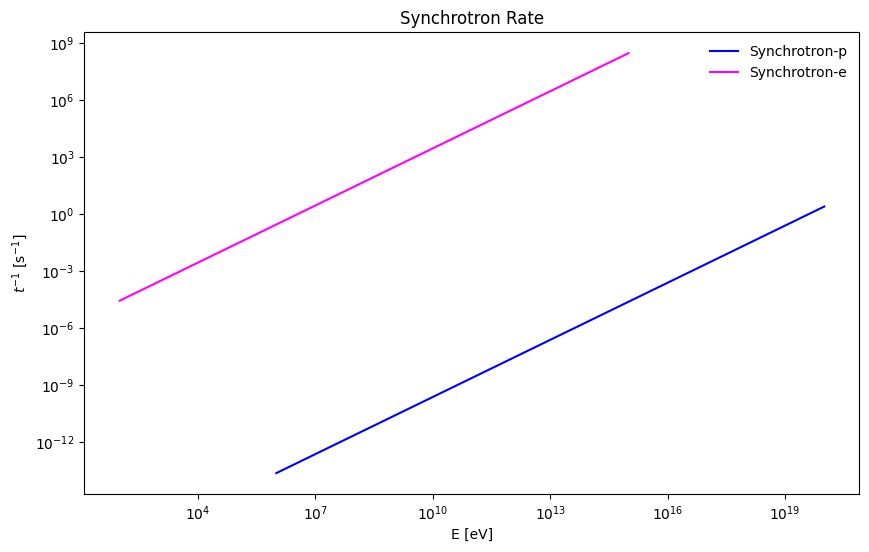

In [4]:
## hadrons

plt.figure(figsize=(10, 6))

## acceleration
# plt.loglog(Ep/eV,[1/time_acc_regime3(va, delta_RX)]*len(Ep),'--',label='Acceleration (Regime 3)',color='red')
# plt.loglog(Ep_drift/eV,1/timeacc_drift(Ep_drift, B_c, va),label='Acceleration (Drift)',color='green')

## losses
plt.loglog(Ep/eV,rate_synch_p(B_c, Ep),label='Synchrotron-p',color='blue')
plt.loglog(Ee/eV,rate_synch_e(B_c, Ee),label='Synchrotron-e',color='magenta')

# plt.loglog(Ep/eV,cooling_rate,label='P-gamma (X)',color='cyan')
# plt.loglog(Ep/eV,cooling_rate_OUV,label='P-gamma (OUV)',color='darkblue')
# plt.loglog(Ep/eV,cooling_rate_bth_isotropic,label='B-H (X)',color='orange')
# plt.loglog(Ep/eV,cooling_rate_bth_ou,label='B-H (OUV)',color='purple')

# plt.xlim((1e11,1e20))
# plt.ylim((1e-7,1e3))

plt.xlabel('E [eV]')
plt.ylabel('$t^{-1}$ [s$^{-1}$]')
plt.title('Synchrotron Rate')

plt.legend(frameon=False,loc='upper right')
# plt.xticks([1e9,1e10,1e11,1e12,1e13,1e14,1e15],labels=['9','10','11','12','13','14','15'])
plt.savefig('plots/sync_rate.png',dpi=300)

plt.show()

In [5]:
# class SynchrotronSED:
#     def __init__(self, particle_distribution, B=100 * u.uG):
#         """Initialize Synchrotron emission model."""
#         self.model = Synchrotron(particle_distribution, B=B)

#     def plot(self, ax, spectrum_energy):
#         """Compute and plot the SED."""
#         sed_syn = self.model.sed(spectrum_energy, distance=1 * u.kpc)
#         ax.loglog(spectrum_energy, sed_syn, label="Synchrotron", linestyle="--")


Synchrotron-Self-Compton (SSC) emission model for the Mkr421 and Mkr501 sources presented in the article Konopelko et al. (2003, ApJ 597).

In [6]:
# import numpy as np
# import astropy.units as u
# from astropy.constants import m_e
# from astropy.coordinates import Distance
# from agnpy.spectra import PowerLaw
# from agnpy.emission_regions import Blob
# from agnpy.compton import SynchrotronSelfCompton
# from agnpy.utils.plot import plot_sed, load_mpl_rc
# import matplotlib.pyplot as plt
# from agnpy.synchrotron import Synchrotron


# ## Setting the quantities (defining a blob)

# R_b = 3.5e15 * u.cm
# V_b = 4 / 3 * np.pi * R_b ** 3
# z = 0.031
# delta_D = 50
# Gamma = 10
# B = 0.04 * u.G

# ## Electron Distribution

# W_e = 1e48 * u.erg    # total energy in electrons

# n_e = PowerLaw.from_total_energy(
#     W_e,
#     V_b,
#     p=4.2,
#     gamma_min=1e2,
#     gamma_max=1.2e6,
#     mass=m_e,
# )

# ## Defining the emission region and the radiative process

# blob = Blob(R_b, z, delta_D, Gamma, B, n_e=n_e)
# ssc = SynchrotronSelfCompton(blob)

# ## Computing the SED over an array of frequencies
# nu = np.logspace(14, 29) * u.Hz
# sed = ssc.sed_flux(nu)

# ## Synchrotron
# synch = Synchrotron(blob)

# ## Let us define a grid of frequencies over which to calculate the synchrotron SED
# nu_syn = np.logspace(8, 23) * u.Hz

# ## Let us compute a synchrotron, and a self-absorbed synchrotron SED
# synch_sed = synch.sed_flux(nu_syn)

# ## Plot
# load_mpl_rc()

# plot_sed(nu_syn, synch_sed, color='blue', label='Synchrotron')
# plot_sed(nu, sed, color='magenta', label='Synchrotron Self Compton')

# ## Selecting the same x and y range of the figure
# plt.xlim([1e5, 1e28])
# plt.ylim([1e-14, 1e-7])

# plt.show()

In [7]:
# ####### TESTS #######



# ## Functions

# # --------------- Synchrotron ---------------
# def synch_emission(nu, B, R, gamma_max, s):
#     '''
#     equivalent to equation (5) of Romero et al. 2010
#     '''
#     U_B = B**2 / (8 * np.pi)

# #     f_nu_sync = (1 / (4 * np.pi * R**2)) * (2/3) * sigma_T * c * (U_B / gamma_max) * (nu / gamma_max)**(-s)
    
#     f_nu_sync = (4/3) * U_B * sigma_T * c * gamma_max**2 * nu**(-s)
    
#     return f_nu_sync





# # --------------- Self-Compton ---------------
# def selfcomp_emission(nu, B, R, gamma_max, s):
#     '''
#     We want to estimate the x, y and z, given the latitude and longitude of the system.
    
#     '''
#     U_B = B**2 / (8 * np.pi)
#     U_ph = h * nu * n_0     # U_ph = epsilon * n(epsilon) , with epsilon = h nu
    
#     f_nu_SSC = synch_emission(nu, B, R, gamma_max, s) / U_B # (U_ph / U_B) * synch_emission(nu)
    
#     return f_nu_SSC

In [8]:
def F_nu(nu_nuc):
    ''' F(nu/nuc) Eq. 4.15 Ghisellini. '''
    integral, _ = quad(lambda y: kv(5/3, y), nu_nuc, np.inf)
    return nu_nuc * integral

def F_low(nu_nuc):
    ''' Low-frequency approximation by a power law of slope 1/3. Eq. (4.16) Ghisellini. '''
    return (4 * np.pi) / (np.sqrt(3) * gamma(1/3)) * (nu_nuc / 2) ** (1/3)

def F_high(nu_nuc):
    ''' High-frequency approximation decay. Eq. (4.17) Ghisellini'''
    return (np.pi / 2)**0.5 * (nu_nuc)**0.5 * np.exp(-nu_nuc)

def F_approx(nu_nuc):
    ''' Full approximation (overestimates around peak). Eq. (4.18) Ghisellini. '''
    return (4 * np.pi) / (np.sqrt(3) * gamma(1/3)) * (nu_nuc / 2) ** (1/3) * np.exp(-nu_nuc)


In [9]:
nu_nuc_vals = np.logspace(-3, 1, 100)
F_vals = np.array([F_nu(x) for x in nu_nuc_vals])
F_low_vals = F_low(nu_nuc_vals)
F_high_vals = F_high(nu_nuc_vals)
F_approx_vals = F_approx(nu_nuc_vals)

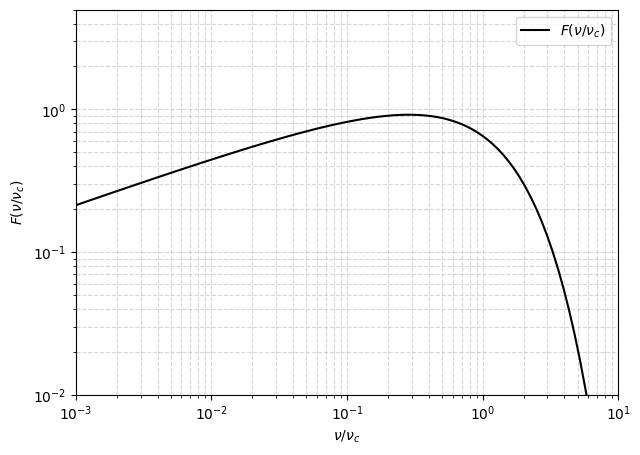

In [10]:
plt.figure(figsize=(7, 5))
plt.loglog(nu_nuc_vals, F_vals, label=r'$F(\nu / \nu_c)$', color='black')

plt.xlabel(r'$\nu / \nu_c$')
plt.ylabel(r'$F(\nu / \nu_c)$')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xlim(0.001, 10)
plt.ylim(0.01, 5)
plt.show()

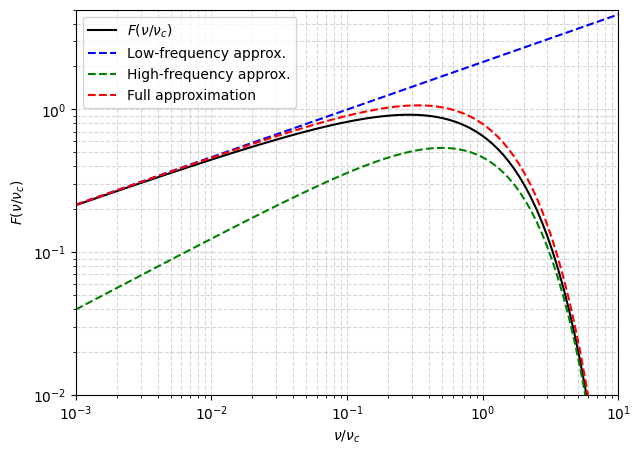

In [11]:
plt.figure(figsize=(7, 5))
plt.loglog(nu_nuc_vals, F_vals, label=r'$F(\nu / \nu_c)$', color='black')
plt.loglog(nu_nuc_vals, F_low_vals, '--', label='Low-frequency approx.', color='blue')
plt.loglog(nu_nuc_vals, F_high_vals, '--', label='High-frequency approx.', color='green')
plt.loglog(nu_nuc_vals, F_approx_vals, '--', label='Full approximation', color='red')

plt.xlabel(r'$\nu / \nu_c$')
plt.ylabel(r'$F(\nu / \nu_c)$')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xlim(0.001, 10)
plt.ylim(0.01, 5)
plt.show()